# **Convolution and Pooling operations from scratch** #

* Matrix implementation of a convolution, max and average pooling operation
* These can be used to build an entire neural network architecture!
* Numpy will be used to implement from scratch
* To give a better illustration famous Lenna image and Gabor filters will be used


In [1]:
import numpy as np
from PIL import Image
from sklearn import datasets
import matplotlib.pyplot as plt


In [2]:
img_RGB = Image.open('lenna.png')
img = img_RGB.convert('L') #Convert RGB image to grayscale


In [3]:
img_RGB_ar = np.array(img_RGB)

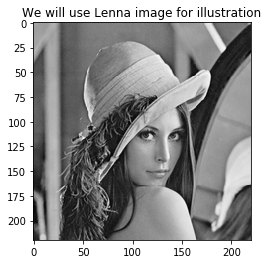

In [30]:
plt.imshow(np.array(img).squeeze(), cmap='gray');
plt.title('We will use Lenna image for illustration', fontsize=12)
plt.show()

In [4]:
print("Size of the image is: "+ str(img.size))


Size of the image is: (220, 220)


In [5]:
l1_filter = np.zeros((2,3,3)) #It will be our kernel 
# It consists of 2 different filters and 3x3 kernel -> 3 row and 3 column
# I will use graysclae image thus my filter size can be 2 dimentional
# If you want to use RGB image filter should be 3 dimentional -> last dimention for channels

In [6]:
l1_filter[0, :, :] = np.array([[[-1, 0, 1],
                                   [-1, 0, 1],
                                   [-1, 0, 1]]])
l1_filter[1, :, :] = np.array([[[1,   1,  1],
                                   [0,   0,  0],
                                   [-1, -1, -1]]])

In [7]:
#This function was taken from numpy.org
def pad_with(vector, pad_width, iaxis, kwargs):
    pad_value = kwargs.get('padder', 10)
    vector[:pad_width[0]] = pad_value
    vector[-pad_width[1]:] = pad_value
    

In [8]:
def matrix_transition_kernel(filters): #Takes input array and convert it for convolution operation

    # take filters -> (#filters,w,h,d)
        
        num_filters,w,h,d = filters.shape
        
        matrix_rep = filters.reshape(num_filters,w*h*d)
        
        return matrix_rep
        
        

In [9]:
def matrix_transition_input(X_input,num_channels,kernel_size,output_shape,stride): #Takes input array and convert it for convolution operation
    
    window_size = kernel_size**2
    
    output = np.zeros((output_shape**2,window_size*num_channels))
    
        
    left_col_border=0
    row_index=0

    
    for right_col_border in range(kernel_size,X_input.shape[0]+1,stride): #right_col_border is started from kernel_length and goes at the end of the input with stride
        
            left_row_border=0
        
            
            for right_row_border in range(kernel_size,X_input.shape[0]+1,stride): #right_row_border is started from kernel_length and goes at the end of the input with stride
                    
                    
                    multi_channels = X_input[left_row_border:right_row_border,left_col_border:right_col_border,:]
                    
                    stretch_channels = multi_channels.reshape(1,window_size*num_channels)
                    
                    output[row_index,:] = stretch_channels
            
                
                    left_row_border += stride
                    row_index += 1
        
            left_col_border += stride

            
    return output.T

In [10]:
#For convolution and max pooling operations there should be matching between shape of the input and kernel matrices
def error_check(X_input, filters, padding, stride):
    
    if (filters.shape[0] != filters.shape[1]):
        print("Size Error!")
        print("CNN kernel shape should be a square")
        
        return True
    elif (X_input.shape[0] - filters.shape[0] + 2*padding)%stride != 0:
        print("Size Error!")
        print("Input size and kernel size are not matching! Process is terminated")
        return True
    else:
        return False

In [11]:
def padding_(X_input,padding):
    w,h,d = X_input.shape
    new_array = np.zeros((w+2*padding,h+2*padding,d))
    for i in range(d):
        new_array[:,:,i] = np.pad(X_input[:,:,i], padding, pad_with, padder=0)
        
    return new_array

In [12]:
def convolution(X_input, filters, padding=0, stride=1):
    
    X_input_arr = np.array(X_input)
    
    
    if len(filters.shape) == 2:
        filters = filters.reshape(1,filters.shape[0],filters.shape[1],1)
    
    if len(filters.shape) == 3:
        filters = filters.reshape(filters.shape[0],filters.shape[1],filters.shape[2],1)
    
    if len(X_input_arr.shape) == 2:
        X_input_arr = X_input_arr.reshape(X_input_arr.shape[0],X_input_arr.shape[1],1)
        
    width = X_input_arr.shape[0] #It should be taken before padding operation to calculate output shape
    
    if padding != 0 :
        X_input_arr = padding_(X_input_arr,padding)
        
    if(error_check(X_input_arr, filters[0], padding, stride)): #for dimentionality check 1 filter is enough!
        return None
    
    
    num_filters = filters.shape[0]
    
    kernel_size = filters.shape[1]
    
    num_channels = X_input_arr.shape[2]
    
    
    output_shape = int((width - kernel_size +2*padding)/stride+1)
    
    input_matrix = matrix_transition_input(X_input_arr,num_channels,kernel_size,output_shape,stride)
    
    filter_matrix = matrix_transition_kernel(filters)
    
    dot_operation = np.dot(filter_matrix,input_matrix)
    dot_operation = dot_operation.T
    conv_out = dot_operation.reshape(output_shape,output_shape,num_filters)
    
    
    return conv_out

In [13]:
def matrix_transition_pooling(X_input,num_channels,kernel_size,output_shape,stride): #Takes input array and convert it for convolution operation
    
    window_size = kernel_size**2
    
    output = np.zeros((output_shape**2,window_size,num_channels))
    
        
    

    for i in range(num_channels):
        left_col_border=0
        row_index=0
        for right_col_border in range(kernel_size,X_input.shape[0]+1,stride): #i is started from kernel_length and goes at the end of the input with stride
        
            left_row_border=0
        
            
            for right_row_border in range(kernel_size,X_input.shape[0]+1,stride): #i is started from kernel_length and goes at the end of the input with stride
                    
                    
                    multi_channels = X_input[left_row_border:right_row_border,left_col_border:right_col_border,i]
                        
                    stretch_channels = multi_channels.reshape(window_size)
                    
                    output[row_index,:,i] = stretch_channels
            
                
                    left_row_border += stride
                    row_index += 1
        
            left_col_border += stride

            
    return output.T

In [14]:
def max_pooling(X_input_arr,window,padding=0,stride=1):

    
    W1 = X_input_arr.shape[0]
    H1 = X_input_arr.shape[1] #It should be taken before padding operation to calculate output shape
    if padding != 0 :
        X_input_arr = padding_(X_input_arr,padding)
        
    if len(X_input_arr) > 2: #It means that layer has multiple filters
        D1 = X_input_arr.shape[2]
        
    
    if(W1 - window + 2*padding)%stride != 0:
        print("Size Error!")
        print("Input size and kernel size are not matching! Process is terminated")
        return None
    
    
    P=padding
    F = window #length of the pooling layer
    S = stride
    
    W2 = int((W1-F+2*P)/S)+1
    H2 = int((H1-F+2*P)/S)+1
    D2 = D1
    
    output_shape = int((W1 - F + 2*padding)/stride+1)
    
    
    num_channels = X_input_arr.shape[-1]
    X_input_arr = matrix_transition_pooling(X_input_arr,num_channels,window,output_shape,stride)
    
    
    dims=[]
    for channels in X_input_arr:
        max_idx = np.argmax(channels, axis=0)
    
        out = channels[max_idx, range(max_idx.size)]
    
        dims.append(out.reshape(H2, W2, 1))
        
    out = np.asarray(dims) #because of append additional dim come to first place in shape -> correct it
    
    out = out.T #To convert column vectors
    out = out.reshape(out.shape[1],out.shape[2],out.shape[3])#Because of append process 1 additional dim was created
    #Erase the first additional dimention
        
    
    return out

    

    

In [15]:
def average_pooling(X_input_arr,window,padding=0,stride=1):

    W1 = X_input_arr.shape[0]
    H1 = X_input_arr.shape[1] #It should be taken before padding operation to calculate output shape
    if padding != 0 :
        X_input_arr = padding_(X_input_arr,padding)
        
    if len(X_input_arr) > 2: #It means that layer has multiple filters
        D1 = X_input_arr.shape[2]
        
    
    if(W1 - window + 2*padding)%stride != 0:
        print("Size Error!")
        print("Input size and kernel size are not matching! Process is terminated")
        return None
    
    
    P=padding 
    F = window #length of the pooling layer
    S = stride
    
    W2 = int((W1-F+2*P)/S)+1
    H2 = int((H1-F+2*P)/S)+1
    D2 = D1
    
    output_shape = int((W1 - F + 2*padding)/stride+1)
    
    
    num_channels = X_input_arr.shape[-1]
    X_input_arr = matrix_transition_pooling(X_input_arr,num_channels,window,output_shape,stride)
    
    out = np.average(X_input_arr, axis=1)
    out = out.T.reshape(H2, W2,D2) #Transpose first to convert from column vector 
    return out

    

    

In [16]:
def pooling(X_input, window, pooling_type, padding=0, stride=1):
    #This function for calling pooling operations
    #padding and stride are set as default
    if pooling_type == 'max_pooling':
        return max_pooling(X_input,window,padding,stride)
    
    elif pooling_type == 'average_pooling':
        return average_pooling(X_input,window,padding,stride)
    
    else:
        print('Error!')
        print('Undefined type of pooling was entered! Select max_pooling or average_pooling')
    

In [17]:
output_of_cnn = convolution(img, l1_filter,padding=1, stride=1)

In [18]:
output_of_cnn.shape #filter size at the end

(220, 220, 2)

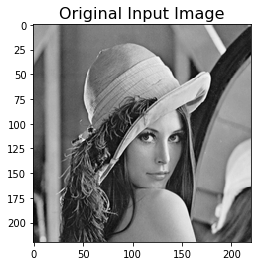

In [19]:
plt.imshow(np.array(img).squeeze(), cmap='gray');
plt.title('Original Input Image', fontsize=16)
plt.show()

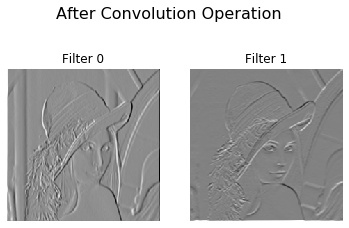

In [20]:
figure = plt.figure()
num_of_images = output_of_cnn.shape[-1]
for index in range(1, num_of_images + 1):
    ax = plt.subplot(1, num_of_images, index)
    plt.axis('off')
    ax.set_title('Filter '+str(index-1))
    plt.imshow(output_of_cnn[:,:,index-1].T.squeeze(), cmap='gray')
    
    
figure.suptitle("After Convolution Operation", fontsize=16)
plt.show()

In [21]:
output_max_pooling = pooling(output_of_cnn,pooling_type='max_pooling',window=2,padding=1,stride=2)

In [22]:
output_max_pooling.shape

(111, 111, 2)

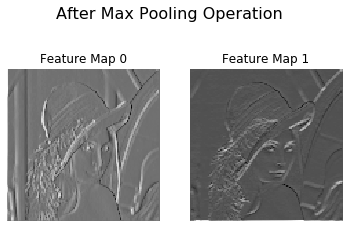

In [23]:
figure = plt.figure()
num_of_images = output_max_pooling.shape[-1]
for index in range(1, num_of_images + 1):
    ax = plt.subplot(1, num_of_images, index)
    plt.axis('off')
    ax.set_title('Feature Map '+str(index-1))
    plt.imshow(output_max_pooling[:,:,index-1].T.squeeze(), cmap='gray') #Transpose for converting image

figure.suptitle("After Max Pooling Operation", fontsize=16)
plt.show()

In [24]:
output_average_pooling = pooling(output_of_cnn,pooling_type='average_pooling',window=4,padding=1,stride=2)

In [25]:
output_average_pooling.shape

(110, 110, 2)

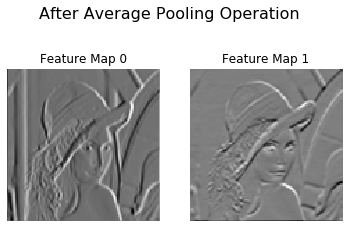

In [26]:
figure = plt.figure()
num_of_images = output_average_pooling.shape[-1]
for index in range(1, num_of_images + 1):
    ax = plt.subplot(1, num_of_images, index)
    plt.axis('off')
    ax.set_title('Feature Map '+str(index-1))
    plt.imshow(output_average_pooling[:,:,index-1].squeeze(), cmap='gray_r')
    
figure.suptitle("After Average Pooling Operation", fontsize=16)
plt.show()